# P4 A mixed bag

In earlier nodes, we found the phase associated with the eigenvectors of the  gate. In this node, we will analyze the QPE algorithm when the target wires are prepared in an arbitrary state instead of one of the eigenvectors.

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

### Codercise P.4.1. 
The objective of this codercise is to observe the outputs of the QPE subroutine when arbitrary states are prepared on the target wire. Prepare the target wires in a superposition of the eigenvectors of the -gate and run the quantum phase estimation algorithm on  estimation wires to observe the results. For this the prepare_eigenvector_superposition function has been given to you. You can test it out by uncommenting the examples given in the code or prepare your own state on the target wires by modifying alpha and beta arguments to observe changes on the measurement probabilities of the estimation wires. Change the value of the variable done to True once you have finished testing out the code

In [ ]:
dev = qml.device("default.qubit", wires=5)
estimation_wires = [0, 1, 2]
target_wires = [3]

def prepare_eigenvector_superposition(alpha, beta):
    # Normalize alpha and beta
    norm_squared = np.abs(alpha) ** 2 + np.abs(beta) ** 2
    norm = np.sqrt(norm_squared)
    state = np.array([alpha/norm, beta/norm])
    
    # Prepare the state
    qml.MottonenStatePreparation(state, wires=target_wires)


@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.
    
    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        array[float]: Probabilities on the estimation wires.
    """
    
    # MODIFY ALPHA, BETA TO PREPARE EIGENVECTOR    
    #prepare_eigenvector_superposition(0, 1)
    # prepare_eigenvector_superposition(1, 0)
    prepare_eigenvector_superposition(1/np.sqrt(2), 1/np.sqrt(2))
    # OR UNCOMMENT LINES ABOVE TO PREPARE THE STATE OF YOUR CHOICE

    qml.QuantumPhaseEstimation(
        unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )
    return qml.probs(wires=estimation_wires)

U = qml.T.compute_matrix()

probs = qpe(U)

# MODIFY TO TRUE WHEN YOU ARE DONE TESTING
done = True



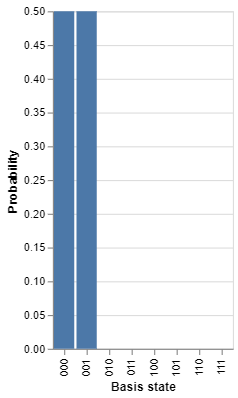

### Codercise P.4.2. 
In this exercise, we will look at a two-qubit unitary, the controlled- gate. Modify the values of alpha, beta, gamma, and delta to observe the changes in the measurement probabilities on the estimation wires. When you are done testing out different values, change the value of the variable probability_100 to return the probability of observing the state  on the estimation wires

In [ ]:
dev = qml.device("default.qubit", wires=5)
estimation_wires = [0, 1, 2]
target_wires = [3, 4]

def prepare_eigenvector_superposition(alpha, beta, gamma, delta):
    # Normalize alpha, beta, gamma, and delta
    norm_squared = np.abs(alpha) ** 2 + np.abs(beta) ** 2 + np.abs(gamma) ** 2 + np.abs(delta) ** 2 
    norm = np.sqrt(norm_squared)
    state = np.array([alpha/norm, beta/norm, gamma/norm, delta/norm])
    
    #Prepare the state
    qml.MottonenStatePreparation(state, wires=target_wires)


@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.
    
    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        array[float]: Probabilities on the estimation wires.
    """
    
    # PREPARE EIGENVECTOR
    prepare_eigenvector_superposition(1/4, 1/4, 1/4, 1/4)
    # prepare_eigenvector_superposition(1, 0, 0, 0)
    
    
    qml.QuantumPhaseEstimation(
        unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )
    return qml.probs(wires=estimation_wires)


U = qml.CZ.compute_matrix()

probs = qpe(U)

# MODIFY TO PROBABILITY OF OBSERVING 100 WHEN ESTIMATION 
# WIRES ARE IN EQUAL SUPERPOSITION
probability_100 = 0.25


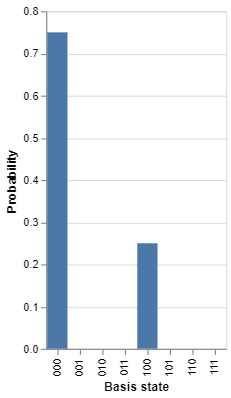

### Codercise P.4.3. 
In this exercise, we will look into unitaries that have more than two eigenvalues and whose eigenphases cannot be represented exactly with  bits. As before, you can change the values of alpha, beta, gamma, and delta to observe the changes in the measurement probabilities on the estimation wires. We will also observe the effects on different unitaries such as the CRZ, CRX, and CRot rotation gates. You can start by preparing one of the eigenstates for a given unitary, followed by preparing an arbitrary state on the target wires to observe changes to the probability distribution.

In [ ]:
dev = qml.device("default.qubit", wires=6)
estimation_wires = [0, 1, 2, 3]
target_wires = [4, 5]

def prepare_eigenvector_superposition(alpha, beta, gamma, delta):
    # Normalize alpha, beta, gamma, and delta
    norm_squared = np.abs(alpha) ** 2 + np.abs(beta) ** 2 + np.abs(gamma) ** 2 + np.abs(delta) ** 2 
    norm = np.sqrt(norm_squared)
    state = np.array([alpha/norm, beta/norm, gamma/norm, delta/norm])
    
    # Prepare the state
    qml.MottonenStatePreparation(state, wires=target_wires)


@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.
    
    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        probs (array[float]): Probabilities on the estimation wires.
    """
    
    # MODIFY ALPHA, BETA, GAMMA, DELTA TO PREPARE EIGENVECTOR 
    prepare_eigenvector_superposition(1/4, 1/4, 1/4, 1/4)
    # prepare_eigenvector_superposition(1, 0, 0, 0)
    # prepare_eigenvector_superposition(0, 1, 0, 0)
    # OR UNCOMMENT LINES ABOVE TO PREPARE THE STATE OF YOUR CHOICE
    
    qml.QuantumPhaseEstimation(
        unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )
    return qml.probs(wires=estimation_wires)


# UNCOMMENT THE LINE CORRESPONDING TO THE MATRIX YOU'D LIKE 
# TO ESTIMATE PHASES OF
# U = qml.CZ.compute_matrix()
# U = qml.CRZ.compute_matrix(0.4)
U = qml.CRX.compute_matrix(1/3)
# U = qml.CRot.compute_matrix(0.9, 0.7, 0.4)

probs = qpe(U)

mystery_phase = 0.9375 # MODIFY THIS


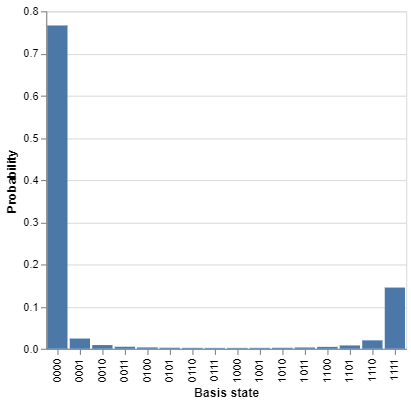